

# Project: No Show Appointments

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

This dataset contains data of 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included :

● "PatinetId" which is specific for every patient 

● "ApointmentId" which is computer generated for every appointmet reservation

● "ScheduledDay" tells us on what day the patient set up their appointment.

● "AppointmentDay" tells us on what day the patient supposed to attend. 

● "Neighborhood" indicates the location of the medical center.

● "Scholarship" indicates whether or not the patient is enrolled in Brasilian welfare program.

● "No_show" it is "Yes" if the patient did not show up, and "No" if the patient showed up to their appointment.

### Questions we are trying to answer :


● What is the percentage of Showing appointments VS missing the appointment

● How many times the same patient take appointment for medical center in the given period

● How many patients from every Sex type

● How many patints enrolled in Brasilian welfare program

● How many patients received SMS for confirmation 

● what is the percentage of having chronic diseases like hypertension and diabetes

● How many patients are drinking alcohol

● What is the percentage of Handicap patients

● What is the ditribution of patients Age

● IS (Age=0) data is accurate or replace it ???

● Is there a relation between Sex type and Showing

● How many patients in every neighbourhood

● what is the Scheduled and appointment day with maximum number of patients

● what is the percentage of patients with zero time between reservation and appointment

● what is the relation between (scheduled day - appointment day) time diffrence and showing

● What is the percentage of showing in patients with zero time reservation

● How is the ditribution of patients on scheduled and appointments days and hours

● What is the relation between Age and (showing, Having Hypertension, Being Diabetic) 

● Is there a relation between being diabetic or hybertensive and showing

● Is there a relation between Sex type and receiving SMS and showing

● Is there arelation between Sex type and Scholarship and showing

### importing the libraries that we gonna use in our inverstigation

In [1]:
# import libraries 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style("whitegrid")

<a id='wrangling'></a>
## Data Wrangling

checking for cleanliness, and then trim and clean the dataset for analysis..


In [2]:
# load data file and show 5 rows from data
df = pd.read_csv("noshowappointments.csv")
df.head()


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [3]:
# check dtype for data and if there is null values 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [4]:
# explore unique values in data
print(df.nunique())

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64


In [5]:
# check for duplication
df.duplicated().sum()

0

### Data Cleaning :

Lower all columns headers and make it without spaces or special characters

edit spelling for Hipertension and Handcap data

delete appointment id data as it is unique for every appointment and not useful for analysis

split date time data for more investigation on day of week and daily hours level

In [6]:
# make columns headers lower and delete (-,_) for last two headers
df.rename(columns = lambda x: x.lower().replace("-","").replace("_",""),inplace=True)
# edit spelling for 2 columns
df.rename(columns={"hipertension":"hypertension","handcap":"handicap"}, inplace=True)
df.head()

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,smsreceived,noshow
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [7]:
# delete appointment id column
df.drop("appointmentid",1,inplace=True)

In [8]:
# split date (yy mm dd) from appointmentday as hour data not available
df["appointmentday"]= df["appointmentday"].apply(lambda x: x.split("T")[0])
# sort data to show time range for appointment days
app_days =df["appointmentday"].sort_values()
print(app_days)

0        2016-04-29
2151     2016-04-29
2152     2016-04-29
2153     2016-04-29
2154     2016-04-29
            ...    
92055    2016-06-08
99217    2016-06-08
99218    2016-06-08
99224    2016-06-08
91900    2016-06-08
Name: appointmentday, Length: 110527, dtype: object


In [9]:
# split hours from sceduledday 
df["scheduledhour"]= df["scheduledday"].apply(lambda x: x.split("T")[1])
print(df["scheduledhour"])

0         18:38:08Z
1         16:08:27Z
2         16:19:04Z
3         17:29:31Z
4         16:07:23Z
            ...    
110522    09:15:35Z
110523    07:27:33Z
110524    16:03:52Z
110525    15:09:23Z
110526    13:30:56Z
Name: scheduledhour, Length: 110527, dtype: object


In [10]:
# split date (yy mm dd) from scheduledday
df["scheduledday"]= df["scheduledday"].apply(lambda x: x.split("T")[0])
# sort data to show time range for scheduled days
print(df["scheduledday"].sort_values())

3764      2015-11-10
46292     2015-12-03
102797    2015-12-07
102796    2015-12-07
102799    2015-12-07
             ...    
92108     2016-06-08
92107     2016-06-08
92092     2016-06-08
92112     2016-06-08
86333     2016-06-08
Name: scheduledday, Length: 110527, dtype: object


In [11]:
# change dtype for some columns
df["patientid"]= df["patientid"].astype("int64").astype("str")
# change dtype for date columns to date time
df["scheduledday"]= pd.to_datetime(df["scheduledday"])
df["scheduledhour"]= pd.to_datetime(df["scheduledhour"])
df["appointmentday"]= pd.to_datetime(df["appointmentday"])
# change dtype from int 64 to bool as bool use less memory and more clear to use in comparison
df["scholarship"]= df["scholarship"].astype("bool")
df["hypertension"]= df["hypertension"].astype("bool")
df["diabetes"]= df["diabetes"].astype("bool")
df["alcoholism"]= df["alcoholism"].astype("bool")
df["handicap"]= df["handicap"].astype("bool")
df["smsreceived"]= df["smsreceived"].astype("bool")

<a id='eda'></a>
## Exploratory Data Analysis




### Define some functions to use during analysis 

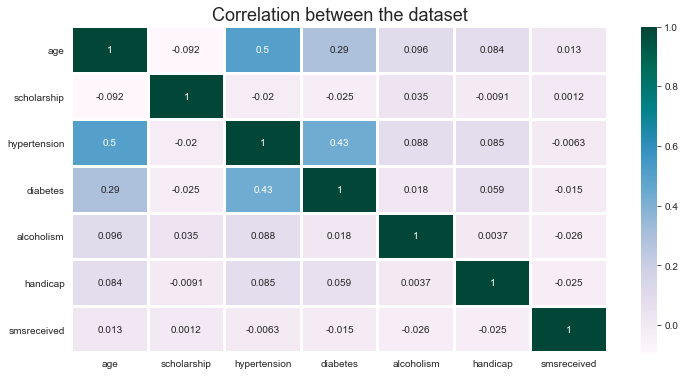

In [85]:
# check for data correlation
df.corr()
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(), annot=True, linewidth=2 , cmap= 'PuBuGn')
plt.title('Correlation between the dataset', fontsize=18)
plt.show()

In [12]:
# count of unique values in every column

def count_of_unique(key,column_name) :

    data = df[key].value_counts().rename_axis(column_name).reset_index(name="count")

    return(data)


In [13]:
# function to plot pie chart 
def plt_pie(chart_data,labels,colors,explode,axes):
    fig = plt.figure(figsize=(8,5))
    ax = fig.add_axes(axes)
    ax.set_title("title", 
             bbox={"facecolor":"0.8", "pad":3})
    plt.pie(chart_data,labels=labels,
    colors=colors,wedgeprops={"edgecolor": "black"},
    shadow=True,startangle=90,pctdistance=0.6,explode=explode,autopct="%1.1f%%",textprops={"fontsize":14,"weight":"bold"})


In [14]:
# function to plot the relation between some variables and showing
def plt_var(key):
    plt.figure(figsize=(10,6), dpi=60)
    sns.countplot(data= df, x= key, hue="noshow", palette= "Blues")
    plt.ylabel("patients count")

In [15]:
# function to plot catplot
def cat_comp(col1,col2,col3):
    sns.catplot(x=col1,hue=col2,col=col3,data=df,kind="count",height=4,aspect=1)

In [16]:
# function to plot relation between age and some other data
ages = df["age"].sort_values().drop_duplicates()
def relation(col):
    plt.figure(figsize=(10,6), dpi=70)
    sns.countplot(data= df, x= "age", hue= col, palette= "Greens")
    plt.ylabel("patients count")
    plt.xticks(ages[::5])

### What is the percentage of Showing appointments VS missing the appointment ?

  noshow  count
0     No  88208
1    Yes  22319


Text(0.5, 1.0, 'percentage of showing')

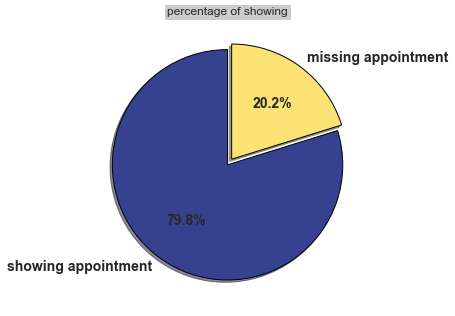

In [17]:
# plot pie chart show percentage of showing 
showing = count_of_unique("noshow","noshow")
print(showing)
labels= ("showing appointment","missing appointment")
colors= "#36428f","#fce174"
explode=[0,0.06]
axes=(0,0,0.5,1)
plt_pie(showing["count"],labels,colors,explode,axes)
plt.title("percentage of showing")

### How many times the same patient take appointment for medical center in the given period ?

In [18]:
# explore patient id data
count_of_unique("patientid","patientid")

,patientid,count
0,822145925426128,88
1,99637671331,84
2,26886125921145,70
3,33534783483176,65
4,6264198675331,62
...,...,...
62294,9267587227475,1
62295,95738672943474,1
62296,47291565883646,1
62297,119777734469,1


In [19]:
# show appointments for the most popular patient id
id= df.loc[df["patientid"]=="822145925426128"]["appointmentday"]
print(id)

3006     2016-04-29
3060     2016-04-29
3093     2016-04-29
6984     2016-05-16
6985     2016-05-06
            ...    
109103   2016-06-08
109114   2016-06-01
109185   2016-06-02
109211   2016-06-03
109231   2016-06-01
Name: appointmentday, Length: 88, dtype: datetime64[ns]


### How many patients from every Sex type ?

  sex_type  count
0        F  71840
1        M  38687


Text(0.5, 1.0, 'percentage of patient gender')

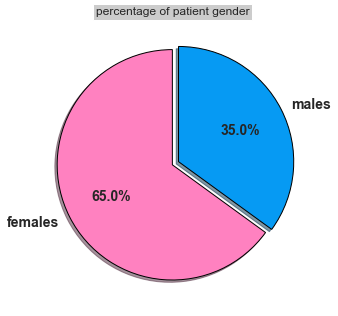

In [20]:
# plot pie chart for male vs female patient
sex = count_of_unique("gender","sex_type")
print(sex)
labels = "females","males"
colors = "#FF81c0","#069AF3"
explode=[0,0.06]
axes=(0,0,0.5,1)
plt_pie(sex["count"],labels,colors,explode,axes)
plt.title("percentage of patient gender")

### How many patients enrolled in Brasilian welfare program ?

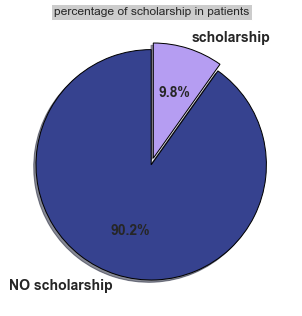

In [21]:
# percentage of patients has scholarship 
scholar= count_of_unique("scholarship","scholarship")
labels= ("NO scholarship","scholarship")
colors= "#36428f","#b59df2"
explode=[0,0.06]
axes=(0,0,0.5,1)
plt_pie(scholar["count"],labels,colors,explode,axes)
plt.title("percentage of scholarship in patients")
plt.show()

### How many patients received SMS for confirmation ?

     sms  count
0  False  75045
1   True  35482


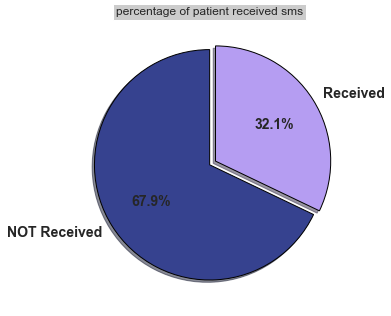

In [22]:
# plot pie chart show percentage of patient received sms
sms=count_of_unique("smsreceived","sms")
print(sms)
labels= ("NOT Received","Received")
colors= "#36428f","#b59df2"
explode=[0,0.06]
axes=(0,0,0.5,1)
plt_pie(sms["count"],labels,colors,explode,axes)
plt.title("percentage of patient received sms")
plt.show()

### What is the percentage of having chronic diseases like hypertension and diabetes ?

   hypertension  count
0         False  88726
1          True  21801


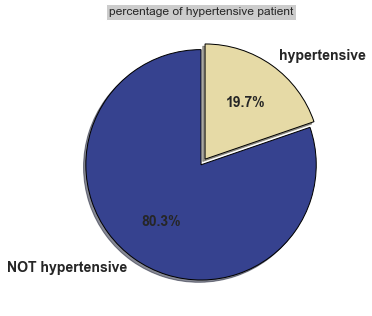

In [23]:
# plot pie chart for hypertensive vs not hypertensive patient
hyper=count_of_unique("hypertension","hypertension")
print(hyper)
labels= ("NOT hypertensive","hypertensive")
colors= "#36428f","#E6DAA6"
explode=[0,0.06]
axes=(0,0,0.5,1)
plt_pie(hyper["count"],labels,colors,explode,axes)
plt.title("percentage of hypertensive patient")
plt.show()

   diabetic   count
0     False  102584
1      True    7943


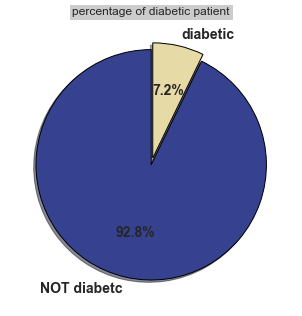

In [24]:
# plot pie chart show percentage of diabetic patient
diabetic=count_of_unique("diabetes","diabetic")
print(diabetic)
labels= ("NOT diabetc","diabetic")
colors= "#36428f","#E6DAA6"
explode=[0,0.06]
axes=(0,0,0.5,1)
plt_pie(diabetic["count"],labels,colors,explode,axes)
plt.title("percentage of diabetic patient")
plt.show()

### How many patients are drinking alcohol ?

   alcoholism   count
0       False  107167
1        True    3360


Text(0.5, 1.0, 'percentage of alcoholic patient')

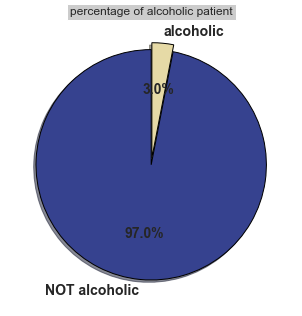

In [25]:
# plot pie chart show percentage of alcoholic patient
alcoholic= count_of_unique("alcoholism","alcoholism")
print(alcoholic)
labels= ("NOT alcoholic","alcoholic")
colors= "#36428f","#E6DAA6"
explode=[0,0.06]
axes=(0,0,0.5,1)
plt_pie(alcoholic["count"],labels,colors,explode,axes)
plt.title("percentage of alcoholic patient")

### What is the percentage of Handicap patients ?

   handicap   count
0     False  108286
1      True    2241


Text(0.5, 1.0, 'percentage of handicap patients')

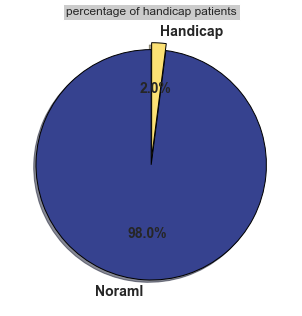

In [26]:
# plot pie chart show percentage of handicap patients 
handicap_patient = count_of_unique("handicap","handicap")
print(handicap_patient)
labels= ("Noraml","Handicap")
colors= "#36428f","#fce174"
explode=[0,0.06]
axes=(0,0,0.5,1)
plt_pie(handicap_patient["count"],labels,colors,explode,axes)
plt.title("percentage of handicap patients")

### What is the ditribution of patients Age ?

In [27]:
# change age data type to int
df["age"]=(df["age"]).astype(int)

In [28]:
# explore age data
df["age"].describe()

count    110527.000000
mean         37.088874
std          23.110205
min          -1.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: age, dtype: float64

In [29]:
# show data for patients with age =-1
min_age= df.loc[df["age"]==-1]["patientid"]
print(min_age)

99832    465943158731293
Name: patientid, dtype: object


In [30]:
# delete some data 
df.drop(df.loc[df["age"]==-1].index, inplace=True)

Text(0.5, 1.0, 'Distribution of patients Age')

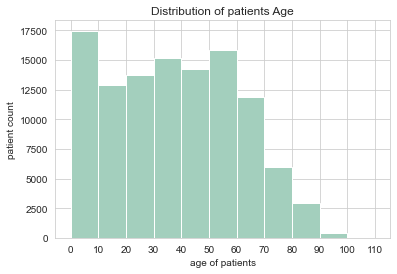

In [31]:
#plot histogram show distribution of patient age
bins=(0,10,20,30,40,50,60,70,80,90,100,110)
plt.hist(df["age"],bins=bins,color="#a3cfbd")
plt.xlabel("age of patients")
plt.ylabel("patient count")
plt.xticks(bins)
plt.title("Distribution of patients Age")

plot Histogram for the distribution of patients age shows that the mode of patients age = 0





which does not make sense and number of patients after 70 is decreasing which make sense

### IS (Age=0) data is accurate or replace it ???

In [32]:
#Check if there is infants with zero Age and True Alcoholic or Hypertensive or Diabetic 
check = df.groupby(["age","hypertension","diabetes","alcoholism"]
).patientid.count().reset_index(name="count")

check.loc[check["age"]==0]

,age,hypertension,diabetes,alcoholism,count
0,0,False,False,False,3539


### Is there a relation between Sex type and Showing ?

In [33]:
# count of male and female patients in noshow data
noshow_gender= df.groupby("gender")["noshow"].value_counts(normalize=True).unstack("gender")
print(noshow_gender)

gender         F         M
noshow                    
No      0.796851  0.800321
Yes     0.203149  0.199679


Text(0.5, 1.0, 'relation between gender and showing')

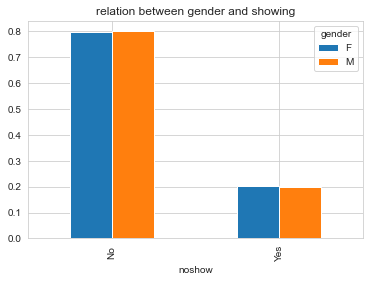

In [34]:
# plot the relation between gender and showing
noshow_gender.plot(kind="bar")
plt.title("relation between gender and showing")


plot chart make comparison between count of patients from every sex and



missing appointments showing that NO Relation between sex type and showing



### How many patients in every neighbourhood ?

In [35]:
# count patients from every neighbourhood
regions = count_of_unique("neighbourhood","neighbourhood")
print(len(regions))
print(regions.head())

81
     neighbourhood  count
0   JARDIM CAMBURI   7717
1      MARIA ORTIZ   5805
2      RESISTÊNCIA   4431
3  JARDIM DA PENHA   3877
4          ITARARÉ   3514


### what is the Scheduled and appointment top 5 day with maximum number of patients ?

In [36]:
# count patients for every scheduledday and define the top days with maximum number of patients
day=count_of_unique("scheduledday","scheduledday")
print("this is the sheduled day with maximum number of patients :\n{}".format(day.iloc[0:5]))

this is the sheduled day with maximum number of patients :
  scheduledday  count
0   2016-05-03   4238
1   2016-05-02   4216
2   2016-05-16   4120
3   2016-05-05   4095
4   2016-05-10   4024


In [37]:
# count patients for every appointment day and define the top 5 day with maximum number of patients
app_day=count_of_unique("appointmentday","appointmentday")
print("this is the appointment day with maximum number of patients :\n{}".format(app_day.iloc[0:5]))

this is the appointment day with maximum number of patients :
  appointmentday  count
0     2016-06-06   4691
1     2016-05-16   4613
2     2016-05-09   4520
3     2016-05-30   4514
4     2016-06-08   4479


### what is the percentage of patients with zero time between reservation and appointment ?

In [38]:
# make a new coloumn with time diffrence between scheduled day and appointment day
df["time_diff"] = df["appointmentday"]-df["scheduledday"]
print(df["time_diff"])

0         0 days
1         0 days
2         0 days
3         0 days
4         0 days
           ...  
110522   35 days
110523   35 days
110524   41 days
110525   41 days
110526   41 days
Name: time_diff, Length: 110526, dtype: timedelta64[ns]


In [39]:
# count of patients with the time diffrence between reservation and appointment
time= count_of_unique("time_diff","time diffrence")
print(time)

    time diffrence  count
0           0 days  38562
1           2 days   6725
2           4 days   5290
3           1 days   5213
4           7 days   4906
..             ...    ...
126       127 days      1
127       126 days      1
128       117 days      1
129        -6 days      1
130       125 days      1

[131 rows x 2 columns]


In [40]:
# percentage of patients with zero days between reservation and appointment
time["count"][0]/time["count"].sum()

0.34889528255795016

### what is the relation between (scheduled day - appointment day) time diffrence and showing ?

In [41]:
time_show= df.groupby(["time_diff","noshow"]).patientid.count().reset_index(name="count")
print(time_show)

    time_diff noshow  count
0     -6 days    Yes      1
1     -1 days    Yes      4
2      0 days     No  36770
3      0 days    Yes   1792
4      1 days     No   4100
..        ...    ...    ...
232  169 days    Yes      1
233  176 days     No     10
234  176 days    Yes      6
235  179 days     No      8
236  179 days    Yes      2

[237 rows x 3 columns]


In [42]:
# delete some data with no sense
df.drop(df.loc[df["time_diff"]==-1].index, inplace=True)
df.drop(df.loc[df["time_diff"]==-6].index, inplace=True)

### What is the percentage of showing in patients with zero time reservation ?

In [43]:
# percentage of missing appointments in patients with zero day waiting time
missing = time_show["count"].iloc[3]/time_show["count"].iloc[2]*100
print(missing)

4.8735382104976885


percentage of missing appointments in patients with zero day waiting time



equal about 5% which is much less than missing percentage for all patients which about 20%

### How is the ditribution of patients on scheduled and appointments days and hours ?

In [44]:
# change date to day of week
df["scheduleddow"]= df["scheduledday"].dt.day_name()
df["appointmentdow"]= df["appointmentday"].dt.day_name()

In [45]:
# count of patients in scheduled day of week

scheduled_patient= count_of_unique("scheduleddow","day of week")
days_order={"monday","tuesday","wednesday","thursday","friday","saturday"}
scheduled_patient_orderd= scheduled_patient.set_index("day of week").reindex(days_order).reset_index()
print(scheduled_patient_orderd)

  day of week  count
0    thursday    NaN
1     tuesday    NaN
2      monday    NaN
3   wednesday    NaN
4    saturday    NaN
5      friday    NaN


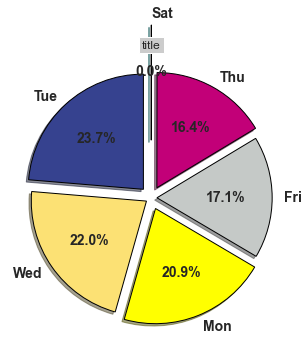

In [46]:
# plot pie chart show percentage of patients per scheduled day
labels=("Tue","Wed","Mon","Fri","Thu","Sat")
colors=("#36428f","#fce174","#FFFF00","#C5C9C7","#C20078","#00FFFF")
explode=( 0.1, 0.05, 0.1, 0.05, 0.1,0.5)
axes=(0,0,0.5,1)
plt_pie(scheduled_patient["count"],labels,colors,explode,axes)

plot pie chart show percentage of reservation on all week days shows that 


about 67% of patients scheduled in only 3 days during the week


TUE is the most crowded day with 23.7% of patient

In [47]:
# count of patients in appointment day of week
appoint_patient= count_of_unique("appointmentdow","day of week")
print(appoint_patient)

  day of week  count
0   Wednesday  25867
1     Tuesday  25640
2      Monday  22714
3      Friday  19019
4    Thursday  17247
5    Saturday     39


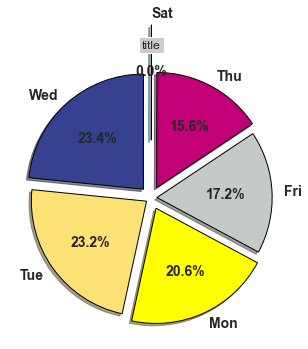

In [48]:
# plot pie chart show percentage of patients per day
labels=("Wed","Tue","Mon","Fri","Thu","Sat")
colors=("#36428f","#fce174","#FFFF00","#C5C9C7","#C20078","#00FFFF")
explode=(0.1, 0.05, 0.1, 0.05, 0.1, 0.5)
axes=(0,0,0.5,1)
plt_pie(appoint_patient["count"],labels,colors,explode,axes)

plot pie chart show percentage of appointment on all week days shows that 


about 67% of patients appomited in only 3 days during the week


WED is the most crowded day with 23.4% of patient

In [49]:
# count of patients per hour
hours= df["scheduledhour"].dt.hour
hours.value_counts().rename_axis("hour").reset_index(name="count")

,hour,count
0,7,19213
1,8,15348
2,9,12823
3,10,11056
4,14,9127
5,13,9036
6,11,8462
7,15,8079
8,16,5542
9,12,5422


Text(0.5, 1.0, 'distribution of patients count per hours')

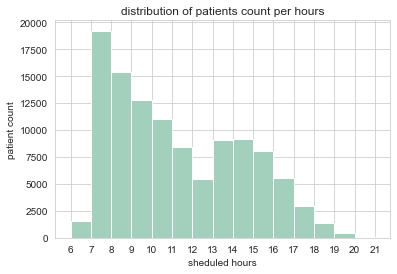

In [50]:
# plot histogram show distribution of patients count per hours
bins=(21-6)
plt.hist(hours,bins=bins,color="#a3cfbd")
plt.xlabel("sheduled hours")
plt.ylabel("patient count")
plt.xticks([6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21])
plt.title("distribution of patients count per hours")

plot Histogram show the distribution of patients reservation during the day


work hours start from 6 am and the peak is at 7 am start decreasing untill 12



after that slightly increase at 1 pm and decrease again from 2 pm to close time

### What is the relation between Age and (showing, Having Hypertension, Being Diabetic)?

Text(0.5, 1.0, 'relation between age and showing')

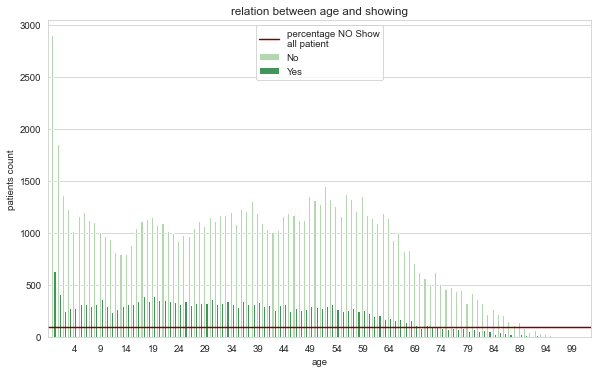

In [51]:
# plot relation between age and showing
relation("noshow")
plt.axhline(df.noshow.map({"yes":0,"No":1}).mean()*100,color="maroon",label="percentage NO Show\nall patient")
plt.legend()
plt.title("relation between age and showing")

plot the relation between age and showing appointments shows no obvious relation


only slightly increase in showing percentage in very older patients above 80 years old


but on the other side (50-60) age range show less than the youngest patients.


Text(0.5, 1.0, 'relation between age and having hypertension')

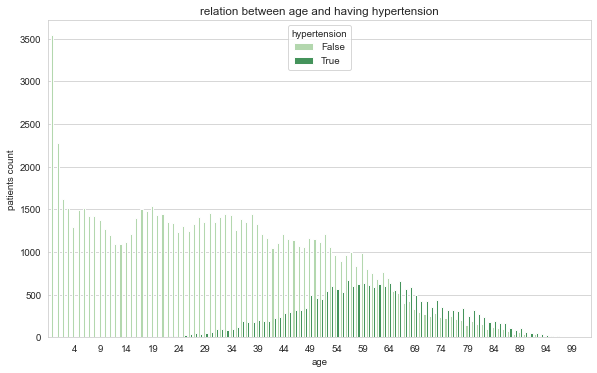

In [52]:
# plot chart show relation between age and hypertension
relation("hypertension")
plt.title("relation between age and having hypertension")

plot the relation between age and being hypertensive shows arelation as hypertensive patients start to increase



from age 25 and continue increasing untill age of 65 in this particular age



hypertensive patients percentage become more than patients with normal BP

Text(0.5, 1.0, 'relation between age and being diabetic')

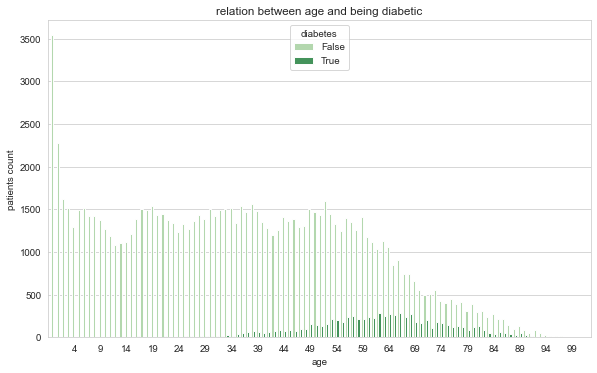

In [53]:
# plot chart show relation between age and diabetes
relation("diabetes")
plt.title("relation between age and being diabetic")

plot the relation between age and being diabetic shows the relation is not that obvious



as being diabetic starts from age 33 but percentage of diabetic patients do not increase with age.



### Is there a relation between being diabetic or hybertensive and showing ?

Text(0.5, 1.0, 'relation between being hypertensive and showing')

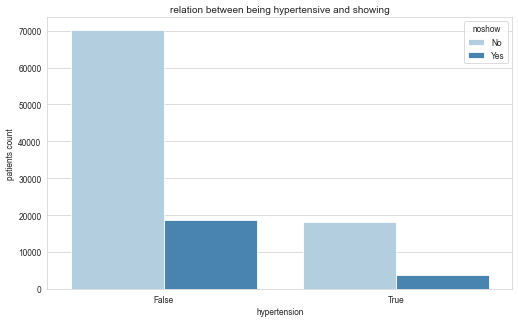

In [54]:
# plot relation between being hypertensive and showing
plt_var("hypertension")
plt.title("relation between being hypertensive and showing")

plot the relation between being hypertensive and showing appointments,


shows that hypertensive patients and NOT hypertensive patients missing appointments


with the same percentage so no relation between being hypertensive and showing



Text(0.5, 1.0, 'relation between being diabetic and showing')

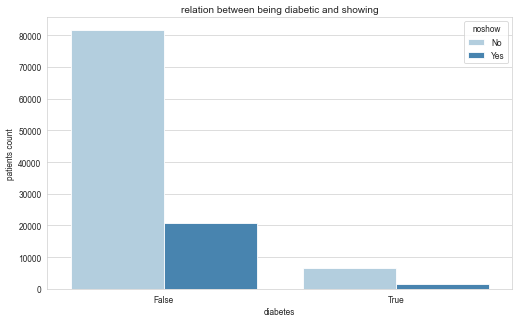

In [55]:
# plot relation between being diabetic and showing
plt_var("diabetes")
plt.title("relation between being diabetic and showing")

plot the relation between being diabetic and showing appointments



shows that no relation between being diabetic and showing


as diabetic and NOt diabetic patient miss appointments with the same percentage

In [56]:
# count diabetic and hypertensivepatient and check for showing
df.groupby(["diabetes","hypertension","noshow"]).patientid.count().reset_index(name="count")


,diabetes,hypertension,noshow,count
0,False,False,No,69010
1,False,False,Yes,18258
2,False,True,No,12684
3,False,True,Yes,2631
4,True,False,No,1168
5,True,False,Yes,289
6,True,True,No,5345
7,True,True,Yes,1141


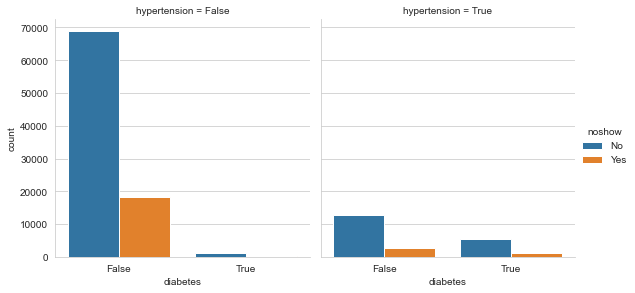

In [57]:
# plot catplot show relation between being diabetic and hypertensive and showing
cat_comp("diabetes","noshow","hypertension")

plot relation between having chronic dieases like being (hypertensive and diabetic) and showing 



shows that there is very small number of patients that are diabetic and NOT hypertensive



so they not even appear in the chart, but over all patients that have hypertensive and diabetes



miss their appointments with the same percentage as all other patients








### Is there a relation between Sex type and receiving SMS and showing ?

In [58]:
# relation between receiving sms with showing 
sms = df.groupby("smsreceived")["noshow"].value_counts(normalize=True).unstack("smsreceived")
print(sms)

smsreceived     False     True 
noshow                         
No           0.832965  0.724255
Yes          0.167035  0.275745


<AxesSubplot:xlabel='noshow'>

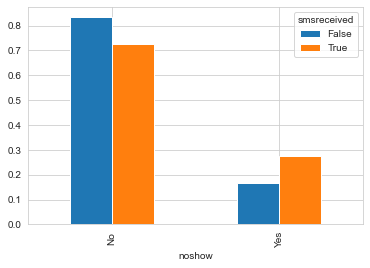

In [59]:
sms.plot(kind="bar")

plot the relation between receiving confirmation SMS and missing appointments shows that 

receiving SMS has not any effect in increasing showing percentage at all even

some  patients that did not receive SMS show thier appointment more than the patient that received SMS  

In [84]:
# relation between patients gender and have received sms with showing 
df.groupby(["gender","smsreceived","noshow"]).patientid.count().reset_index(name="count")

,gender,smsreceived,noshow,count
0,F,False,No,39763
1,F,False,Yes,7874
2,F,True,No,17482
3,F,True,Yes,6720
4,M,False,No,22746
5,M,False,Yes,4661
6,M,True,No,8216
7,M,True,Yes,3064


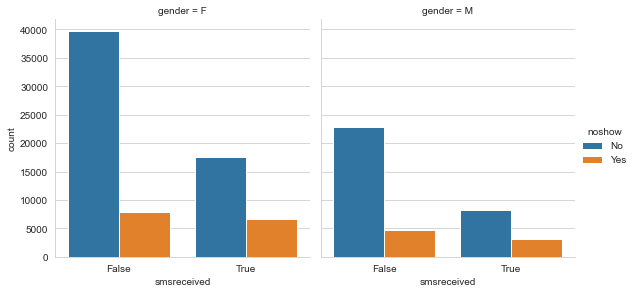

In [61]:
# plot the relation between gender and receiving sms with showing
cat_comp("smsreceived","noshow","gender")

In [62]:
# relation between having scholarship with showing 
scholar = df.groupby("scholarship")["noshow"].value_counts(normalize=True).unstack("scholarship")
print(scholar)

scholarship     False     True 
noshow                         
No           0.801926  0.762637
Yes          0.198074  0.237363


plot the relation between gender and receiving confirmation SMS and missing the appointments

shows that the percentage of missing appointments does not change betwwen male and female when receiving SMS

still the males and females patients that received SMS miss more appointments than males and females that

did not received SMS and nearly with the same percentage
 

### is there arelation between receiving sms and Scholarship and showing ?

Text(0.5, 1.0, 'relation between having scholarship and showing')

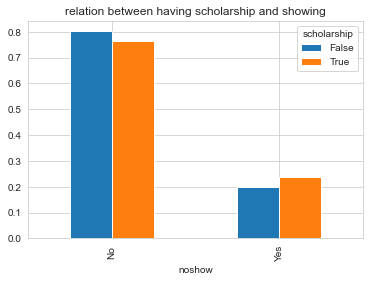

In [63]:
# plot relation between having scholarship and showing
scholar.plot(kind="bar")
plt.title("relation between having scholarship and showing")

plot relation between scholarship and missing appointments shows 


patients with scholarship missing percentage is the same for patients that

with no scholarship so no relation between scholarship and missing appointments
 

In [64]:
sms_schol= df.groupby(["smsreceived","scholarship"])["noshow"].value_counts(normalize=True).unstack(["smsreceived","scholarship"])
print(sms_schol)

smsreceived     False               True           
scholarship     False     True      False     True 
noshow                                             
No           0.835407  0.810495  0.731057  0.662197
Yes          0.164593  0.189505  0.268943  0.337803


<AxesSubplot:xlabel='noshow'>

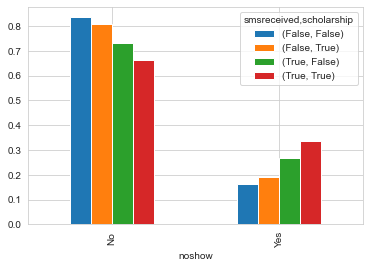

In [65]:
# plot the relation between receiving sms and scholarship and showing
sms_schol.plot(kind="bar")

In [82]:
df.pivot(index="patientid",columns="age")
plt.pcolor(df,cmap="RdBu")
plt.colorbar()


AttributeError: 'Series' object has no attribute 'pivot'

plot the relation between having scholarship and receiving confirmation SMS and showing appointments

and again there is no positive effect for having scholar ship and receiving SMS as patients that

have scholarship and receiving SMS miss appointments with more percentage than the patients do not


<a id='conclusions'></a>
## Conclusions

●the percentage of Showing appointments is 79.8 % VS 20.2% for missing the appointment.



●Patient id differs from appointment id as it is unique value for every patient and 
there is many patients take appointments many times during the period that data shows.



●the most polpular patient take appointment for medical center 88 times in the given period.



●females patients is more than males with 65 % females and only 35 % males.



●9.8 % only from patients enrolled in Brasilian welfare program and 90.2 % are not.



●32.1% of patients received confirmation SMS VS 67.9% did not received.



●19.7% from patients are hypertensive and 7.2% are diabetic and only 3% are alcoholic.



●month (May) was the month that has the most 5 crowded scheduled days and 3 from the top 5 appointment days
and 2 days was in month (Jun) which make sense as appointment may be after many days from reservation.



●Sunday is off and Saturday with very small numbers of patients looks like it works
for emergency only or limited hours only but MON,TUE and WED is the most crowded days
in scheduling and appointing.




●scheduling work hours start from 6 am and the peak is at 7 am start decreasing untill 12
after that slightly increase at 1 pm and decrease again from 2 pm to close time.



●about 35% of patients wait zero time between reservation and appointment and percentage
of showing dramaticaly increase from about 80% to about 95% for patients with zero time waiting.




●there is relation between age and being hypertensive as hypertensive patients start to increase
from age 25 and increase untill age of 65 in this particular age hypertensive patients percentage
become more than patients with normal BP,this relation is not that obvious with being diabetic as it starts
from age 35 but percentage of diabetic patients do not increase with age.



●there is no relation between age and showing appointments only slightly increase in showing percentage in
very older patients above 80 years old but on theothe side (50-60) age range show less than the youngest patients.



●there is no relation between being hypertensive or diabetic or being hypertensive and diabetic in showing appointments.



●there is no relation between having scholarship and showing or even between having scholarship and receiving confirmation SMS.



●about confirmation SMS the analysis show that it has not any effect in increasing showing percentage at all even
some cases patients that did not receive SMS show thier appointment more than the patient that received SMS  





## limitation

●there is no enough data to check the effect of showing appointments like :

Culture status of patients, Socioeconomic status of patients, Jops of patients 
and distance between patients home and medical center



●the Appointment day has not hour data which may be helpful for 
checking if patients miss the appointments at specefic hours



●there is data does not make much sense like :

the most common value in Age data is 0 


















